<a href="https://colab.research.google.com/github/jscienciadados/IA-Classificacao/blob/main/Analizando_credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como utilizar o R no Google Colab

1 - Open your favorite browser.
2 - Create a new notebook: https://colab.research.google.com/#create=true.

ou
https://colab.research.google.com/#create=true&language=r

À primeira vista, não há diferença entre notebooks com tempos de execução Python e R. No entanto, se formos para as configurações de "Runtime" e selecionar "Alterar tipo de tempo de execução", obteremos uma caixa de diálogo confirmando que já estamos no tempo de execução R


Porque usar o Google Colab com R? na minha opinião e bom para quem tem pouco recursos disponiveis na maquina e precisa criar uma solução para demonstrar para um potencial cliente. basta voce criar um repositorio no github e ter acesso a internet que voce podera fazer a sua demonstração.

Lembrando que é necessário carregar a fonte de dados.

# Instalação das Bibliotecas

Basta instala-las apenas uma vez e carrega-las sempre que for utilizá-las.

In [45]:
#install.packages("caret")
#install.packages("ROCR")
#install.packages("e1071")

Carregas as Bibliotecas

In [2]:
library(caret)
library(ROCR)
library(e1071)

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [3]:
# Cerregando o dataset
cred = read.csv("data/credit_dataset_final.csv", header = TRUE, sep = ",")

In [4]:
head(cred)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,⋯,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,18,3,2,1049,1,1,4,1,⋯,4,2,21,2,1,1,3,1,1,1
2,1,1,9,3,4,2799,1,2,2,3,⋯,2,1,36,2,1,2,3,2,1,1
3,1,2,12,2,4,841,2,3,2,1,⋯,4,1,23,2,1,1,2,1,1,1
4,1,1,12,3,4,2122,1,2,3,3,⋯,2,1,39,2,1,2,2,2,1,2
5,1,1,12,3,4,2171,1,2,4,3,⋯,4,2,38,1,2,2,2,1,1,2
6,1,1,10,3,4,2241,1,1,1,3,⋯,3,1,48,2,1,2,2,2,1,2


In [5]:
summary(cred)

 credit.rating account.balance credit.duration.months
 Min.   :0.0   Min.   :1.000   Min.   : 4.0          
 1st Qu.:0.0   1st Qu.:1.000   1st Qu.:12.0          
 Median :1.0   Median :2.000   Median :18.0          
 Mean   :0.7   Mean   :2.183   Mean   :20.9          
 3rd Qu.:1.0   3rd Qu.:3.000   3rd Qu.:24.0          
 Max.   :1.0   Max.   :3.000   Max.   :72.0          
 previous.credit.payment.status credit.purpose  credit.amount      savings     
 Min.   :1.000                  Min.   :1.000   Min.   :  250   Min.   :1.000  
 1st Qu.:2.000                  1st Qu.:2.000   1st Qu.: 1366   1st Qu.:1.000  
 Median :2.000                  Median :3.000   Median : 2320   Median :1.000  
 Mean   :2.292                  Mean   :2.965   Mean   : 3271   Mean   :1.874  
 3rd Qu.:3.000                  3rd Qu.:4.000   3rd Qu.: 3972   3rd Qu.:3.000  
 Max.   :3.000                  Max.   :4.000   Max.   :18424   Max.   :4.000  
 employment.duration installment.rate marital.status    guaran

In [6]:
# Tipos dos dados
str(cred)

'data.frame':	1000 obs. of  21 variables:
 $ credit.rating                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ account.balance               : int  1 1 2 1 1 1 1 1 3 2 ...
 $ credit.duration.months        : int  18 9 12 12 12 10 8 6 18 24 ...
 $ previous.credit.payment.status: int  3 3 2 3 3 3 3 3 3 2 ...
 $ credit.purpose                : int  2 4 4 4 4 4 4 4 3 3 ...
 $ credit.amount                 : int  1049 2799 841 2122 2171 2241 3398 1361 1098 3758 ...
 $ savings                       : int  1 1 2 1 1 1 1 1 1 3 ...
 $ employment.duration           : int  1 2 3 2 2 1 3 1 1 1 ...
 $ installment.rate              : int  4 2 2 3 4 1 1 2 4 1 ...
 $ marital.status                : int  1 3 1 3 3 3 3 3 1 1 ...
 $ guarantor                     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ residence.duration            : int  4 2 4 2 4 3 4 4 4 4 ...
 $ current.assets                : int  2 1 1 1 2 1 1 1 3 4 ...
 $ age                           : int  21 36 23 39 38 48 39 40 65 23 ...
 $ other.credits

Análise Exploratória de Dados

In [7]:
# Transformando variaveis em fatores
to.factors <- function(df, variables) {
  for (variable in variables) {
    df[[variable]] <- as.factor(df[[variable]])
  }
  return(df)
}

In [8]:
# Normalização
scale.features <- function(df, variables) {
  for (variable in variables) {
    df[[variable]] <- scale(df[[variable]], center = T, scale = T)
  }
  return(df)
}

In [9]:
# Normalizando as variáveis
numeric.vars <- c("credit.duration.months", "age", "credit.amount")
cred_dataset_scaled <- scale.features(cred, numeric.vars)

In [10]:
# Variáveis do tipo fator
categorical.vars <- c('credit.rating', 'account.balance', 'previous.credit.payment.status',
                      'credit.purpose', 'savings', 'employment.duration', 'installment.rate',
                      'marital.status', 'guarantor', 'residence.duration', 'current.assets',
                      'other.credits', 'apartment.type', 'bank.credits', 'occupation',
                      'dependents', 'telephone', 'foreign.worker')

In [11]:
# Aplicando as conversões ao dataset
cred_dataset_final <- to.factors(df = cred_dataset_scaled, variables = categorical.vars)

In [12]:
head(cred_dataset_final)

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,⋯,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
,<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,"<dbl[,1]>",<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,-0.2407368,3,2,-0.7872630,1,1,4,1,⋯,4,2,-1.28093214,2,1,1,3,1,1,1
2,1,1,-0.9870788,3,4,-0.1673006,1,2,2,3,⋯,2,1,0.04034293,2,1,2,3,2,1,1
3,1,2,-0.7382981,2,4,-0.8609500,2,3,2,1,⋯,4,1,-1.10476213,2,1,1,2,1,1,1
4,1,1,-0.7382981,3,4,-0.4071375,1,2,3,3,⋯,2,1,0.30459795,2,1,2,2,2,1,2
5,1,1,-0.7382981,3,4,-0.3897785,1,2,4,3,⋯,4,2,0.21651294,1,2,2,2,1,1,2
6,1,1,-0.9041519,3,4,-0.3649800,1,1,1,3,⋯,3,1,1.09736299,2,1,2,2,2,1,2


In [13]:
summary(cred_dataset_final)

 credit.rating account.balance credit.duration.months.V1
 0:300         1:274           Min.   :-1.401713        
 1:700         2:269           1st Qu.:-0.738298        
               3:457           Median :-0.240737        
                               Mean   : 0.000000        
                               3rd Qu.: 0.256825        
                               Max.   : 4.237315        
 previous.credit.payment.status credit.purpose  credit.amount.V1   savings
 1: 89                          1:103          Min.   :-1.070320   1:603  
 2:530                          2:181          1st Qu.:-0.675138   2:103  
 3:381                          3:364          Median :-0.337170   3:111  
                                4:352          Mean   : 0.000000   4:183  
                                               3rd Qu.: 0.248340          
                                               Max.   : 5.368078          
 employment.duration installment.rate marital.status guarantor
 1:234       

In [14]:
# Preparando os dados de treino e de teste
indexes <- sample(1:nrow(cred_dataset_final), size = 0.6 * nrow(cred_dataset_final))
train.data <- cred_dataset_final[indexes, ]
test.data <- cred_dataset_final[-indexes, ]
class(train.data)
class(test.data)

[1] "data.frame"

[1] "data.frame"

In [15]:
# Separando os atributos e as classes
test.features.vars <- test.data[, -1]
test.class.vars <- test.data[, 1]
class(test.features.vars)

[1] "data.frame"

In [16]:
# Construindo o modelo de regressão logistica
formula.init <- "credit.rating ~ ."
formula.init <- as.formula(formula.init)
modelo_v1 <- glm(formula = formula.init, data = train.data, family = "binomial")

In [17]:
# Visualizando os detalhes do modelo
summary(modelo_v1)


Call:
glm(formula = formula.init, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6523  -0.6154   0.3916   0.6952   2.3494  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -1.0319     1.1722  -0.880 0.378711    
account.balance2                  0.4899     0.2846   1.721 0.085226 .  
account.balance3                  1.6019     0.2844   5.632 1.78e-08 ***
credit.duration.months           -0.3107     0.1451  -2.141 0.032312 *  
previous.credit.payment.status2   0.8784     0.4220   2.081 0.037400 *  
previous.credit.payment.status3   1.5348     0.4355   3.524 0.000425 ***
credit.purpose2                  -1.6395     0.5125  -3.199 0.001378 ** 
credit.purpose3                  -1.5388     0.4968  -3.097 0.001953 ** 
credit.purpose4                  -1.9564     0.4756  -4.113 3.90e-05 ***
credit.amount                    -0.3384     0.1758  -1.925 0.0542

In [18]:
# Gerando as previsoes
previsoes <- predict(modelo_v1, test.data, type = "response")
previsoes <- round(previsoes)
print(previsoes)

  1   3   5   9  10  18  20  22  27  29  30  32  35  39  41  45  47  49  53  55 
  0   1   1   1   0   1   1   1   0   1   1   1   1   1   1   1   1   1   1   1 
 59  63  67  70  76  77  83  88  91  93  96 102 103 107 111 114 115 121 122 123 
  1   1   1   1   1   1   1   1   1   0   1   0   1   1   0   1   1   0   1   0 
128 130 132 134 135 136 137 140 141 143 148 149 151 158 159 160 162 163 169 172 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   1   1   1   0 
174 177 185 186 192 194 204 205 209 211 212 213 215 218 222 223 229 231 238 241 
  1   1   1   1   1   1   1   1   0   1   0   0   0   1   1   1   1   1   0   1 
242 243 247 248 249 250 257 258 261 262 266 268 270 272 274 276 277 278 279 281 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
283 285 286 287 290 293 294 296 299 301 302 307 309 312 313 317 319 320 321 325 
  1   0   1   1   1   1   1   1   1   0   1   1   0   1   1   1   1   1   1   1 
327 328 330 332 334 336 338 

In [19]:
# Confusion Matrix
confusionMatrix(table(data = previsoes, reference = test.class.vars), positive = '1')

Confusion Matrix and Statistics

    reference
data   0   1
   0  69  40
   1  62 229
                                         
               Accuracy : 0.745          
                 95% CI : (0.6993, 0.787)
    No Information Rate : 0.6725         
    P-Value [Acc > NIR] : 0.0009827      
                                         
                  Kappa : 0.395          
                                         
 Mcnemar's Test P-Value : 0.0375889      
                                         
            Sensitivity : 0.8513         
            Specificity : 0.5267         
         Pos Pred Value : 0.7869         
         Neg Pred Value : 0.6330         
             Prevalence : 0.6725         
         Detection Rate : 0.5725         
   Detection Prevalence : 0.7275         
      Balanced Accuracy : 0.6890         
                                         
       'Positive' Class : 1              
                                         

Selecionando as melhores features

In [20]:
# Feature Selection
formula <- "credit.rating ~ ."
formula <- as.formula(formula)
control <- trainControl(method = "repeatedcv", number = 10, repeats = 2)
model <- train(formula, data = train.data, method = "glm", trControl = control)
importance <- varImp(model, scale = FALSE)


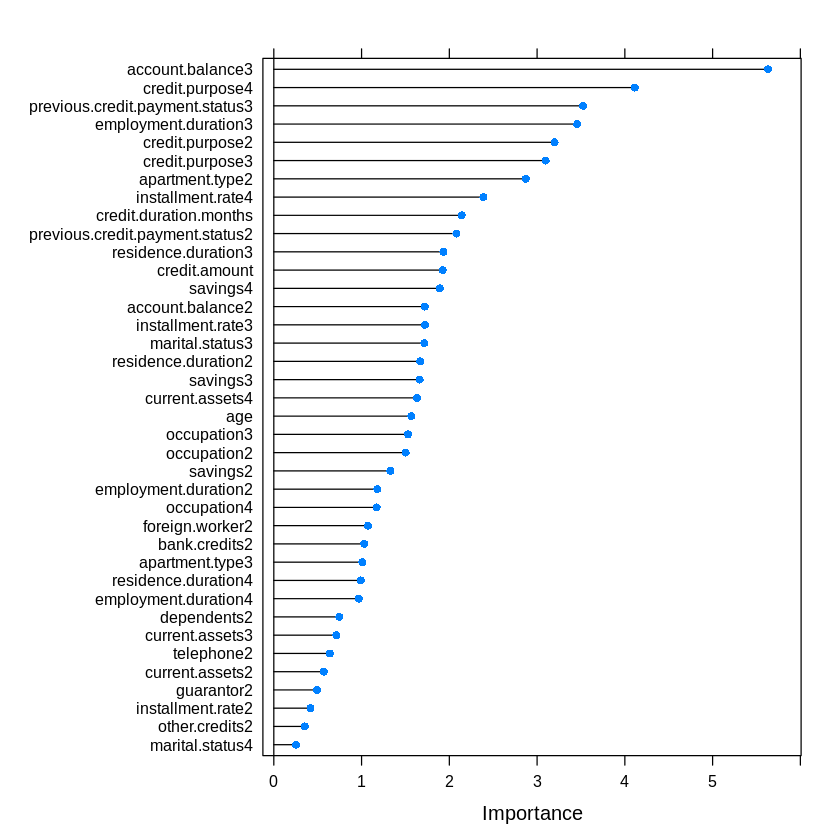

In [21]:
# Plot
plot(importance)

In [22]:
# Construindo um novo modelo com as variáveis selecionadas
formula.new <- "credit.rating ~ account.balance + credit.purpose + previous.credit.payment.status + savings + credit.duration.months"
formula.new <- as.formula(formula.new)
modelo_v2 <- glm(formula = formula.new, data = train.data, family = "binomial")

In [23]:
# Visualizando o novo modelo
print(summary(modelo_v2))


Call:
glm(formula = formula.new, family = "binomial", data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4790  -0.8280   0.4995   0.7638   1.8504  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -0.0190     0.4986  -0.038 0.969609    
account.balance2                  0.4890     0.2519   1.941 0.052211 .  
account.balance3                  1.4805     0.2523   5.867 4.44e-09 ***
credit.purpose2                  -1.1452     0.4391  -2.608 0.009098 ** 
credit.purpose3                  -0.8944     0.4122  -2.170 0.030036 *  
credit.purpose4                  -1.2322     0.4076  -3.023 0.002500 ** 
previous.credit.payment.status2   0.9356     0.3584   2.611 0.009038 ** 
previous.credit.payment.status3   1.4311     0.3715   3.853 0.000117 ***
savings2                          0.4660     0.3672   1.269 0.204484    
savings3                          0.6856     0.3880   1.767 0.07724

In [24]:
# Prevendo e Avaliando o modelo
previsoes_new <- predict(modelo_v2, test.data, type = "response")
previsoes_new <- round(previsoes_new)

In [25]:
# Confusion Matrix
confusionMatrix(table(data = previsoes_new, test.class.vars), positive = '1')

Confusion Matrix and Statistics

    test.class.vars
data   0   1
   0  50  31
   1  81 238
                                          
               Accuracy : 0.72            
                 95% CI : (0.6732, 0.7635)
    No Information Rate : 0.6725          
    P-Value [Acc > NIR] : 0.02326         
                                          
                  Kappa : 0.2954          
                                          
 Mcnemar's Test P-Value : 3.656e-06       
                                          
            Sensitivity : 0.8848          
            Specificity : 0.3817          
         Pos Pred Value : 0.7461          
         Neg Pred Value : 0.6173          
             Prevalence : 0.6725          
         Detection Rate : 0.5950          
   Detection Prevalence : 0.7975          
      Balanced Accuracy : 0.6332          
                                          
       'Positive' Class : 1               
                                          

Avaliando a performance do modelo

In [26]:
modelo_final <- modelo_v2
previsoes <- predict(modelo_final, test.features.vars, type = "response")
previsoes_finais <- prediction(previsoes, test.class.vars)


In [27]:
# Função para Plot ROC
plot.roc.curve <- function(predictions, title.text){
  perf <- performance(predictions, "tpr", "fpr")
  plot(perf,col = "black",lty = 1, lwd = 2,
       main = title.text, cex.main = 0.6, cex.lab = 0.8,xaxs = "i", yaxs = "i")
  abline(0,1, col = "red")
  auc <- performance(predictions,"auc")
  auc <- unlist(slot(auc, "y.values"))
  auc <- round(auc,2)
  legend(0.4,0.4,legend = c(paste0("AUC: ",auc)), cex = 0.6, bty = "n", box.col = "white")
 
}

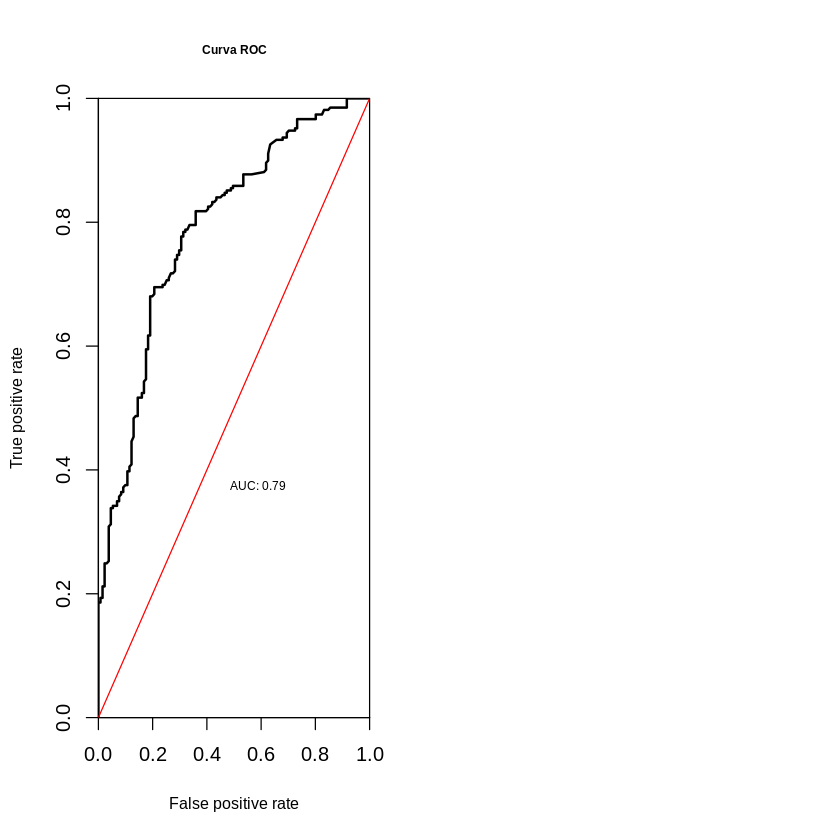

In [28]:
# Plot
par(mfrow = c(1, 2))
plot.roc.curve(previsoes_finais, title.text = "Curva ROC")

Fazendo Previsões em novos Dados

In [29]:
# Novos dados
account.balance <- c(1, 4, 3)
credit.purpose <- c(4, 2, 3)
previous.credit.payment.status <- c(3, 3, 2)
savings <- c(2, 3, 2)
credit.duration.months <- c(15, 12, 8)

In [30]:
# Cria um dataframe
novo_dataset <- data.frame(account.balance,
                           credit.purpose,
                           previous.credit.payment.status,
                           savings,
                          credit.duration.months)

In [31]:
novo_dataset

account.balance,credit.purpose,previous.credit.payment.status,savings,credit.duration.months
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4,3,2,15
4,2,3,3,12
3,3,2,2,8


In [32]:
# Separa variáveis explanatórias numéricas e categóricas
new.numeric.vars <- c("credit.duration.months")
new.categorical.vars <- c('account.balance', 'previous.credit.payment.status',
                          'credit.purpose', 'savings')


In [34]:
# Aplica as transformações
novo_dataset_final <- to.factors(df = novo_dataset, variables = new.categorical.vars)
str(novo_dataset_final)

'data.frame':	3 obs. of  5 variables:
 $ account.balance               : Factor w/ 3 levels "1","3","4": 1 3 2
 $ credit.purpose                : Factor w/ 3 levels "2","3","4": 3 1 2
 $ previous.credit.payment.status: Factor w/ 2 levels "2","3": 2 2 1
 $ savings                       : Factor w/ 2 levels "2","3": 1 2 1
 $ credit.duration.months        : num  15 12 8


In [35]:
novo_dataset_final <- scale.features(novo_dataset_final, new.numeric.vars)
str(novo_dataset_final)

'data.frame':	3 obs. of  5 variables:
 $ account.balance               : Factor w/ 3 levels "1","3","4": 1 3 2
 $ credit.purpose                : Factor w/ 3 levels "2","3","4": 3 1 2
 $ previous.credit.payment.status: Factor w/ 2 levels "2","3": 2 2 1
 $ savings                       : Factor w/ 2 levels "2","3": 1 2 1
 $ credit.duration.months        : num [1:3, 1] 0.9492 0.0949 -1.0441
  ..- attr(*, "scaled:center")= num 11.7
  ..- attr(*, "scaled:scale")= num 3.51


In [37]:
novo_dataset_final

account.balance,credit.purpose,previous.credit.payment.status,savings,credit.duration.months
<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>"
1,4,3,2,0.9491580
4,2,3,3,0.0949158
3,3,2,2,-1.0440738


In [38]:
novo_dataset_final$account.balance

[1] 1 4 3
Levels: 1 3 4

In [42]:
#head(cred_dataset_final)
cred_dataset_final$account.balance

[1] 1 1 2 1 1 1 1 1 3 2 1 1 1 2 1 1 1 2 2 3 1 2 2 2 1 2 1 2 3 3 3 3 3 3 1 1 3
  [38] 3 3 3 3 1 3 2 2 1 3 3 3 1 3 3 3 3 3 1 3 1 3 3 3 3 3 3 1 3 3 3 2 3 2 3 3 3
  [75] 3 2 3 3 1 3 3 3 2 3 3 1 3 3 1 2 2 2 2 1 2 3 2 2 1 2 3 1 2 2 3 3 3 3 3 3 1
 [112] 1 2 3 2 2 2 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 2 3 3 3 2 3 3 3 1 1
 [149] 3 2 3 3 3 2 2 3 1 3 2 2 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 2 3 3 3 3 1 3 3
 [186] 3 3 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 1 1 2 1 2 2 3 3 1 1 3 2 3 3 3 1 3 1 3
 [223] 3 3 1 3 1 3 3 2 3 3 3 1 2 1 3 1 3 3 3 3 3 3 3 3 3 3 2 3 2 2 3 3 3 3 1 3 1
 [260] 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 1 3 3 3 3 2 1 3 1 3 3 3 3 3 3 2 3 3
 [297] 3 3 2 3 1 3 3 3 3 3 1 3 1 3 3 3 3 2 1 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3
 [334] 3 3 1 1 1 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 1 3 3 1 3 3 3 3 1 3 3 3 3 3 2 1 1
 [371] 1 3 2 1 3 1 1 2 2 3 1 1 3 2 3 2 2 3 3 1 3 3 3 3 3 2 2 3 3 2 2 2 1 3 3 2 3
 [408] 2 2 3 3 3 3 3 3 3 3 3 3 1 3 2 2 3 3 3 2 2 1 2 3 3 2 2 3 3 3 3 1 2 3 3 1 3
 [445] 3 3 3 3 3 2 2 1 2 2 1 2 2 2 2 3 2 2 3 1 2 3 2 3 2 3 3 3 3 3 3 3 3 3 3 2 3
 [482] 2 3 3 3 3 3 2 3 3 3 3 1 3 1 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 2 2 3 2 2 3
 [519] 3 3 3 3 3 3 2 3 1 2 3 3 3 3 3 1 1 2 3 3 3 2 2 2 2 2 3 2 2 3 2 3 2 3 3 3 2
 [556] 3 2 3 3 2 3 3 2 3 3 2 2 3 3 3 3 3 2 2 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1
 [593] 1 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 3 3 1 1 1 1 3 3 3
 [630] 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 3 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 1 2
 [667] 2 2 2 2 2 2 2 2 2 3 1 2 2 2 2 2 2 2 1 3 2 2 3 1 3 1 2 3 3 3 3 3 2 1 1 2 1
 [704] 1 1 3 3 2 1 3 3 1 3 3 3 3 1 3 2 2 2 3 3 3 1 2 3 3 3 2 2 3 3 1 1 3 2 3 2 2
 [741] 3 3 1 3 3 3 2 3 2 3 2 1 2 2 2 1 1 1 2 2 2 1 3 2 3 3 2 3 2 1 1 1 1 1 1 1 2
 [778] 1 2 3 2 1 2 2 1 3 2 2 2 2 2 3 1 1 3 2 3 3 1 3 1 1 1 2 1 1 2 1 1 1 2 1 3 1
 [815] 2 3 3 1 2 3 2 1 1 1 1 2 2 1 2 2 2 3 3 3 3 2 3 2 3 3 1 2 3 2 2 2 2 2 2 2 2
 [852] 1 2 3 3 1 1 1 1 1 3 1 2 3 1 3 2 2 2 2 1 3 3 3 2 2 2 1 1 1 1 3 1 2 2 2 1 1
 [889] 1 2 2 1 2 1 2 2 3 3 2 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 [926] 1 1 1 1 2 2 1 2 1 1 1 2 2 2 2 3 2 3 2 1 2 3 3 1 3 2 3 2 3 3 1 2 2 2 2 3 2
 [963] 2 1 2 2 3 1 1 1 3 2 3 1 1 1 2 1 2 1 2 3 2 1 1 3 1 1 1 2 1 2 1 1 1 1 1 3 2
[1000] 1
Levels: 1 2 3

In [43]:
novo_dataset_final$account.balance

[1] 1 4 3
Levels: 1 3 4

In [44]:
# Prevendo um novo cliente
#previsao_novo_cliente <- predict(modelo_v2, newdata = novo_dataset_final, type = "response")

In [ ]:
# tive um problema ao prever novo cliente, no level da variavel acount.balance, se algumem resolver pra mim agradeço
# mas este jupyter foi mais para ter certeza de como executar o R no Google Colab
# e como podem ver e muito facil e simples de executa-lo.